## Solve Block-Diagonal Matrix





A **block-diagonal matrix** is a square matrix with square blocks of non-zero values along the diagonal, and zeros elsewhere. For example, the following matrix A is an example of a block-diagonal matrix of size $7\times 7$, with 3 diagonal blocks of size $2\times 2$, $3\times 3$, and $2 \times 2$ respectively:

$$
A =
\begin{pmatrix}
7 & 5 & 0 & 0 & 0 & 0 & 0 \\
4 & 6 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & -9 & 5 & 4 & 0 & 0 \\
0 & 0 & 3 & 2 & 6 & 0 & 0 \\
0 & 0 & 1 & 3 & 2 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & -7 \\
0 & 0 & 0 & 0 & 0 & 5 & 9
\end{pmatrix}.
$$


The code below creates a block-diagonal matrix with random non-zero values between 0 and 1, where all blocks have identical size.

In [1]:
import numpy as np
from scipy.linalg import block_diag

def random_blocks(m, shape):
    '''
    Returns a list of m random matrices of size shape[0] x shape[1].
    '''
    #randomly generate a numpy array with a shpae (m*shape[0],shape[1])
    mat = np.random.random([m * shape[0], shape[1]])
    #split mat into m arraies, each with a size(shape[0],shape[1])
    blocks = np.split(mat, m)
    
    return blocks

#generate a list of 4 matrices with size(3,2) randomly
blocks = random_blocks(4, (3, 2))
#form a diagonal matrix by the above blocks
A = block_diag(*blocks)

print(np.round(A, 3))

[[0.794 0.253 0.    0.    0.    0.    0.    0.   ]
 [0.539 0.376 0.    0.    0.    0.    0.    0.   ]
 [0.397 0.659 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.569 0.861 0.    0.    0.    0.   ]
 [0.    0.    0.365 0.476 0.    0.    0.    0.   ]
 [0.    0.    0.281 0.827 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.284 0.943 0.    0.   ]
 [0.    0.    0.    0.    0.196 0.282 0.    0.   ]
 [0.    0.    0.    0.    0.108 0.045 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.089 0.454]
 [0.    0.    0.    0.    0.    0.    0.216 0.798]
 [0.    0.    0.    0.    0.    0.    0.797 0.288]]


We consider only block-diagonal matrices with $m$ blocks, where all diagonal blocks have the same shape $n \times n$. A block-diagonal system $Ax = b$ can be written as

$$
\begin{pmatrix}
A_{1} & & & \\
& A_{2} & & \\
& & \ddots & \\
& & & A_{m}
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_m
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_m
\end{pmatrix}
\qquad \Leftrightarrow \qquad
\begin{cases}
A_{1} x_1 &= b_1 \\
A_{2} x_2 &= b_2 \\
&\vdots \\
A_{m} x_m &= b_m
\end{cases},
$$

where $A_i$ is the $i$th diagonal block of $A$, and $x_i$, $b_i$ are blocks of length $n$ of the vectors $x$ and $b$ respectively, for $i=1, 2, \dots, m$. Note that when $m=1$, this is a diagonal system.

We assume that all diagonal blocks $A_i$ are invertible, and therefore that the matrix $A$ is also invertible.

New fuction `linsolve_block_diag(blocks, b)` which takes 2 input arguments:

- `blocks`, a list of length $m$ storing a collection of $n \times n$ NumPy arrays (e.g. as returned by `random_blocks()` from **2.1**) representing the blocks $A_i$,
- a NumPy vector `b` of length $mn$.

It would solve the block-diagonal system $Ax = b$, by solving **each sub-system $A_i x_i = b_i$ separately**, and return the solution as a NumPy vector `x` of length $mn$. 


In [2]:
def linsolve_block_diag(blocks, b):
    '''
    Solves the block-diagonal system Ax=b,
    where the diagonal blocks are listed in "blocks".
    '''
    sol=np.array([[]])
    for i in range(len(blocks)):
        block_i=np.array(blocks[i]) #find bloack_i
        n,m=np.shape(block_i)
        b_i=np.array(b[n*i:n*i+n]) #find b_i
        sol=np.append(sol,np.linalg.solve(block_i, b_i)) # solve each A_i *x=b_i and append them back to a numpy vector
    return sol


#test a block diagonal system with two 2*2 blocks randomly generated from 2.1

#generate a list of 2 matrices with size(2,2) randomly
blocks = random_blocks(2, (2, 2))
#form a diagonal matrix by the above blocks
A = block_diag(*blocks)
b=np.random.random(2*2)
print("block-diagonal system")
print(A)
print("solution from linsolve_block_diag(blocks, b)")
print(linsolve_block_diag(blocks, b))
print("solution from np.linalg.solve(A,b)")
print(np.linalg.solve(A,b))

block-diagonal system
[[0.48523381 0.13823375 0.         0.        ]
 [0.80270589 0.50195154 0.         0.        ]
 [0.         0.         0.2780906  0.28207107]
 [0.         0.         0.69028146 0.14313473]]
solution from linsolve_block_diag(blocks, b)
[ 2.35989068 -2.9732936  -0.59707038  4.11414068]
solution from np.linalg.solve(A,b)
[ 2.35989068 -2.9732936  -0.59707038  4.11414068]


Compare the computation time needed to solve a block-diagonal system $Ax = b$ using 2 different methods:

- solving the system by separation of the blocks linsolve_block_diag(blocks, b)
- solving the full system with a general method np.linalg.solve(A,b)

Consider block-diagonal systems with block sizes $n = 5, 10, 15, 20$, and a total number $m = 5, 10, 15, \dots, 40$ of blocks. For each combination of $n$ and $m$:
Compare the computation time needed for two different methods.


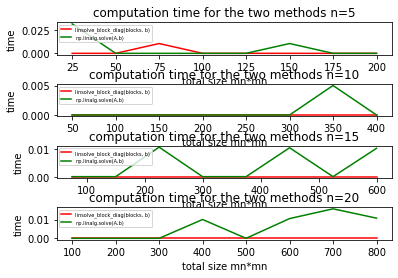

In [3]:
import time
import matplotlib.pyplot as plt
m=np.linspace(5,40,8)
def time_compare(n):
    """compute the time used  for two methods with differnet input n"""
    global t_a, t_b
    t_a=np.array([]) # store computation time for linsolve_block_diag(blocks, b)
    t_b=np.array([]) # store computation time for np.linalg.solve(A, b)
    for i in range(len(m)):
        #rabdomly generate the desired matrix 
        blocks = random_blocks(int(m[i]), (n, n))
        A = block_diag(*blocks)
        b=np.random.random(int(m[i])*n)
        #computation time for linsolve_block_diag(blocks, b)
        t_a0=time.time()
        linsolve_block_diag(blocks, b)
        t_a1=time.time()-t_a0
        t_a=np.append(t_a,t_a1)
        #computation time for np.linalg.solve(A, b)
        t_b0=time.time()
        np.linalg.solve(A, b)
        t_b1=time.time()-t_b0
        t_b=np.append(t_b,t_b1)
    return t_a, t_b
    

fig, ax = plt.subplots(4,1)
plt.subplots_adjust(hspace=0.9)
hspace=2
#the first graph n=5
time_compare(5)
ax[0].plot(5*m, t_a,'r',label="linsolve_block_diag(blocks, b)")
ax[0].plot(5*m, t_b,'g',label="np.linalg.solve(A,b)")
ax[0].set_title("computation time for the two methods n=5")
ax[0].set_ylabel("time")
ax[0].set_xlabel("total size mn*mn")
#the second graph n=10
time_compare(10)
ax[1].plot(10*m, t_a,'r',label="linsolve_block_diag(blocks, b)")
ax[1].plot(10*m, t_b,'g',label="np.linalg.solve(A,b)")
ax[1].set_title("computation time for the two methods n=10")
ax[1].set_ylabel("time")
ax[1].set_xlabel("total size mn*mn")
#the second graph n=15
time_compare(15)
ax[2].plot(15*m, t_a,'r',label="linsolve_block_diag(blocks, b)")
ax[2].plot(15*m, t_b,'g',label="np.linalg.solve(A,b)")
ax[2].set_title("computation time for the two methods n=15")
ax[2].set_ylabel("time")
ax[2].set_xlabel("total size mn*mn")
#the fourth graph n=20
time_compare(20)
ax[3].plot(20*m, t_a,'r',label="linsolve_block_diag(blocks, b)")
ax[3].plot(20*m, t_b,'g',label="np.linalg.solve(A,b)")
ax[3].set_title("computation time for the two methods n=20")
ax[3].set_ylabel("time")
ax[3].set_xlabel("total size mn*mn")

ax[0].legend(loc='upper left', fontsize=5)
ax[1].legend(loc='upper left', fontsize=5)
ax[2].legend(loc='upper left', fontsize=5)
ax[3].legend(loc='upper left', fontsize=5)
plt.show()